### **Phần 1: Principal Component Analysis (PCA)**

### 1. Tiền xử lý dữ liệu 

In [20]:
import pandas as pd

# Load the CSV file to inspect the data structure
file_path = "data/delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv"
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       26217 non-null  object 
 1   SUBSIDIARY_CD                    26217 non-null  object 
 2   GLOBAL_NO                        26217 non-null  object 
 3   CLASSIFY_CD                      26217 non-null  int64  
 4   CUST_CD                          26217 non-null  int64  
 5   BRAND_CD                         26217 non-null  object 
 6   INNER_CD                         26217 non-null  object 
 7   SUPPLIER_CD                      26217 non-null  object 
 8   Sales order line number          26217 non-null  int64  
 9   Stock class                      26217 non-null  int64  
 10  Consider count hodiday Saturday  26217 non-null  int64  
 11  SO QTY                           26217 non-null  int64  
 12  OTHER AREA SHIP DI

(   Order date SUBSIDIARY_CD       GLOBAL_NO  CLASSIFY_CD  CUST_CD BRAND_CD  \
 0  2022-08-25           MJP  08344472000137     21031103   344472     OSA1   
 1  2022-08-12           MJP  06000641365551      3712333      641     MSM1   
 2  2022-07-08           MJP  07032167936864     21045918    32167     SMC1   
 3  2022-07-08           MJP  01710046000973     21058302   710046     MIB1   
 4  2022-08-25           MJP  07107539916817     21050569   107539     NIQ1   
 
       INNER_CD SUPPLIER_CD  Sales order line number  Stock class  ...  \
 0  F7171260007        8121                        8            1  ...   
 1  30071630003        0263                        1            1  ...   
 2  F7499483132        9102                        1            1  ...   
 3  F4524160001        9163                        1            1  ...   
 4  F3017310155        9176                        6            1  ...   
 
    PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  SPECIAL_DIV  SO_DAY_OF_MONTH  \


In [21]:
# Drop columns with more than 50% missing values and non-numeric columns irrelevant for analysis
threshold = 0.5 * len(data)
columns_to_drop = [
    col for col in data.columns 
    if data[col].isnull().sum() > threshold or data[col].dtype == 'object'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Fill remaining missing values with the mean of the column
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# Normalize numeric data for PCA and clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

# Check the resulting dataset shape and some statistics
data_cleaned.shape, data_cleaned.describe()


((26217, 23),
         CLASSIFY_CD        CUST_CD  Sales order line number   Stock class  \
 count  2.621700e+04   26217.000000             26217.000000  26217.000000   
 mean   8.198807e+06  260390.877293               268.876759      0.989167   
 std    7.766312e+06  245749.298949              4414.921961      0.103517   
 min    1.030101e+06      22.000000                 1.000000      0.000000   
 25%    3.738001e+06   62843.000000                 1.000000      1.000000   
 50%    3.954109e+06  147666.000000                 5.000000      1.000000   
 75%    1.220110e+07  500268.000000                26.000000      1.000000   
 max    2.400000e+07  999691.000000             90007.000000      1.000000   
 
        Consider count hodiday Saturday        SO QTY  ALLOCATION QTY  \
 count                     26217.000000  26217.000000    26217.000000   
 mean                          1.462181     13.371171       13.371171   
 std                           1.891055    107.750615      107.

### 2. Xây dựng và áp dụng PCA

In [22]:
import numpy as np

def myPCA(A):
    cov_matrix = np.cov(A.T)  # Ma trận hiệp phương sai
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Giá trị riêng và vector riêng
    return eigenvectors, eigenvalues

In [23]:
eigenvectors, eigenvalues = myPCA(data_normalized)

In [24]:
# Lựa chọn số thành phần chính
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Số lượng thành phần chính để đạt 95% phương sai
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

17

In [25]:
print(f'Phần trăm phương sai của từng thành phần chính: {explained_variance_ratio}')

Phần trăm phương sai của từng thành phần chính: [ 1.57624141e-01  1.11287195e-01  9.80190302e-02  7.88486662e-02
  7.34006499e-03  1.71211849e-02  2.87015885e-02  5.60678289e-02
  5.32148901e-02  4.97945361e-02  4.82021995e-02  4.71995117e-02
  4.53456668e-02  4.33324288e-02  3.77676928e-02  3.89376400e-02
  4.01051818e-02  4.10905527e-02  2.49708366e-10 -4.83478428e-17
  8.31173197e-18 -3.60800499e-19  0.00000000e+00]


Kết quả cho thấy: Thành phần đầu tiên đóng góp 15.76%, thành phần thứ hai 11.13%, và giảm dần ở các thành phần tiếp theo.

In [26]:
print(f'Tổng phương sai tích lũy: {cumulative_variance}')

Tổng phương sai tích lũy: [0.15762414 0.26891134 0.36693037 0.44577903 0.4531191  0.47024028
 0.49894187 0.5550097  0.60822459 0.65801913 0.70622133 0.75342084
 0.7987665  0.84209893 0.87986663 0.91880427 0.95890945 1.
 1.         1.         1.         1.         1.        ]


Tổng phương sai tích lũy: Với 2 thành phần đầu tiên: 26.89% tổng phương sai được giải thích.

Để đạt 95% tổng phương sai, cần sử dụng 16 thành phần chính.

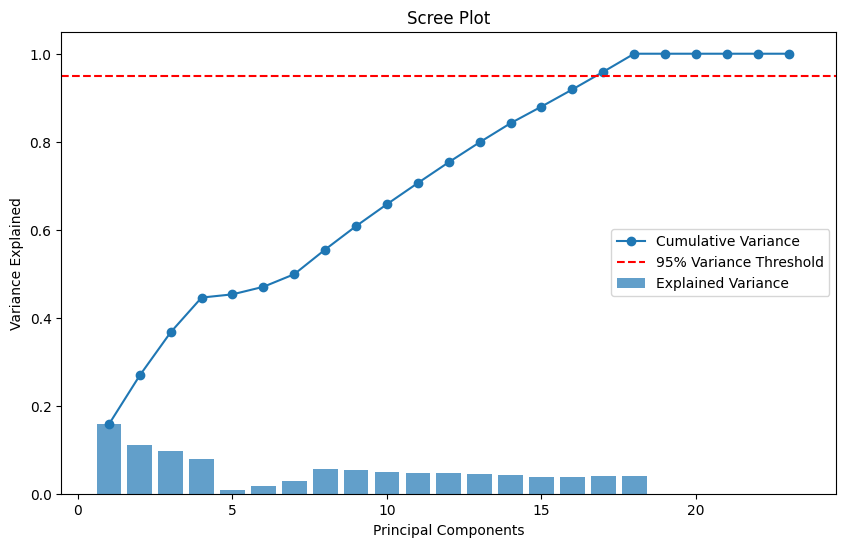

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.show()

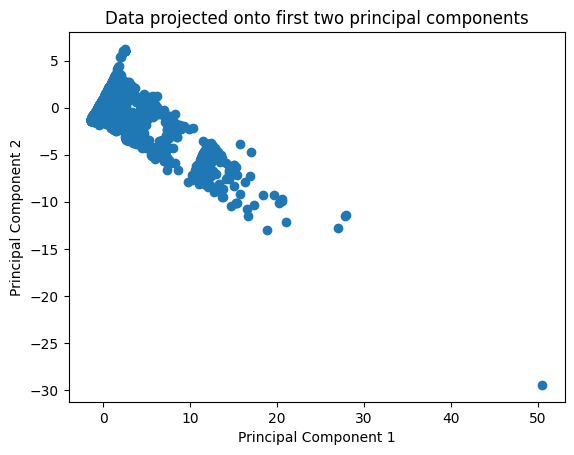

In [15]:
# Vẽ dữ liệu theo hai thành phần chính đầu tiên
import matplotlib.pyplot as plt

reduced_data = data_normalized @ eigenvectors[:, :2]  # Giảm xuống 2 chiều
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data projected onto first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Trả lời câu hỏi lý thuyết**

- Tại sao PCA là một phương pháp hữu ích trong giảm chiều dữ liệu?

PCA giảm chiều dữ liệu bằng cách loại bỏ nhiễu và giữ lại các thành phần chính mang nhiều thông tin nhất. Điều này giúp tăng hiệu quả tính toán và giảm hiện tượng quá khớp.

- Làm thế nào để quyết định số lượng thành phần chính cần sử dụng?

Sử dụng phương sai tích lũy: Chọn số thành phần sao cho tổng phương sai giải thích đạt ít nhất 95% hoặc dựa vào Scree plot (đồ thị phương sai).

- So sánh PCA với kỹ thuật giảm chiều khác?

PCA: Tuyến tính, giữ lại thành phần chính dựa trên phương sai.
t-SNE: Phi tuyến tính, tốt hơn cho trực quan hóa dữ liệu không tuyến tính.
Autoencoder: Học đặc trưng phi tuyến, sử dụng mạng nơ-ron.

### **Phần 2: Phân cụm dữ liệu (Clustering)**

### 1. Tiền xử lý dữ liệu: Tương tự như trên

### 2. Áp dụng K-Mean Clustering

In [40]:
import numpy as np

def myKmeans(A, num_clusters, max_iter=100):
    np.random.seed(42)
    centroids = A[np.random.choice(A.shape[0], num_clusters, replace=False)]
    for _ in range(max_iter):
        # Gán cụm
        distances = np.linalg.norm(A[:, None] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        # Tính toán trung tâm cụm mới
        new_centroids = np.array([A[clusters == k].mean(axis=0) for k in range(num_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

from sklearn.cluster import KMeans

# Áp dụng K-means với số cụm = 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# In nhãn cụm và tọa độ trung tâm
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

print("Cluster Labels (K=2):", labels[:10])  # Hiển thị 10 nhãn đầu tiên
print("Centroids (K=2):\n", centroids)

Cluster Labels (K=2): [0 1 0 0 0 0 0 0 0 0]
Centroids (K=2):
 [[ 1.40449526  0.0839099   0.12202515 -0.26189375  1.13715275  0.12100313
   0.12100313  0.17135234 -0.26189375  0.38725058  0.03502347  0.17135099
  -0.65367771  0.         -0.18938725  0.11309774  0.06894799  1.36865747
   0.38725058  0.0629397   0.10790304  0.03092789 -0.00607114]
 [-0.56121327 -0.03352902 -0.04875925  0.10464845 -0.45438759 -0.04835087
  -0.04835087 -0.06846959  0.10464845 -0.15473898 -0.01399481 -0.06846904
   0.26119889  0.          0.07567604 -0.045192   -0.02755049 -0.54689308
  -0.15473898 -0.02514967 -0.04311629 -0.01235828  0.00242593]]


- Trung tâm của cụm 0 có giá trị cao hơn ở nhiều đặc trưng, chẳng hạn như CLASSIFY_CD (1.40449526) và SUPPLIER_DIV (1.36865747), cho thấy đây là cụm có các giá trị cao hơn trung bình ở các đặc trưng liên quan.
- Ngược lại, cụm 1 có các giá trị thấp hơn trung bình ở hầu hết các đặc trưng.

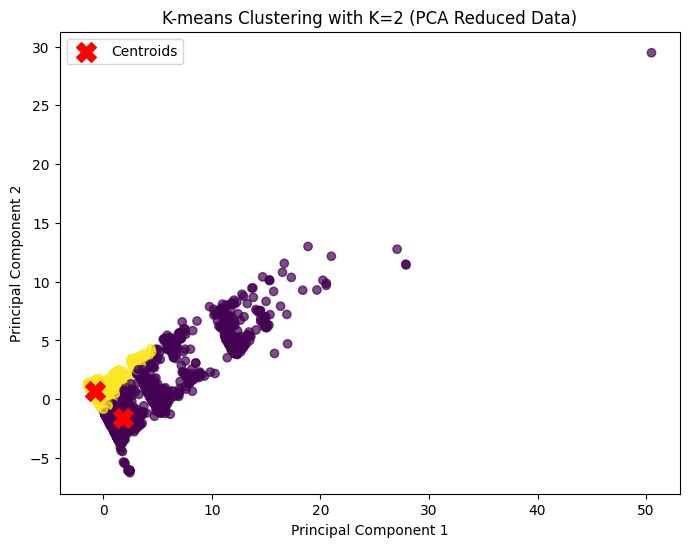

In [44]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2D với PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Áp dụng K-means với số cụm = 2 trên dữ liệu PCA
labels, centroids = myKmeans(pca_result, 2)

# Trực quan hóa cụm
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with K=2 (PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
# Tính toán chỉ số Silhouette
silhouette = silhouette_score(data_normalized, labels)
print(f"Silhouette Score (K=2): {silhouette:.2f}")

Silhouette Score (K=2): 0.26


Với $𝐾$ = 2, chỉ số này là 0.26, một giá trị khá thấp. Điều này cho thấy rằng các cụm không được phân biệt rõ ràng và có thể có sự chồng chéo giữa hai cụm.

In [47]:
# Thêm nhãn cụm vào dữ liệu
data_with_labels = pd.DataFrame(data_normalized, columns=data_cleaned.columns)
data_with_labels['Cluster'] = labels

# Tính toán các đặc điểm trung bình của từng cụm
cluster_analysis = data_with_labels.groupby('Cluster').mean()
print("Cluster Analysis:\n", cluster_analysis)

Cluster Analysis:
          CLASSIFY_CD   CUST_CD  Sales order line number  Stock class  \
Cluster                                                                
0           1.359435  0.078369                 0.118818    -0.253333   
1          -0.561565 -0.032373                -0.049082     0.104648   

         Consider count hodiday Saturday    SO QTY  ALLOCATION QTY  \
Cluster                                                              
0                               1.120962  0.119192        0.119192   
1                              -0.463055 -0.049237       -0.049237   

         SUPPLIER INV AMOUNT  PRODUCT ATTRIBUTION  SPECIAL DIV  ...  label  \
Cluster                                                         ...          
0                   0.186564            -0.253333     0.374472  ...    0.0   
1                  -0.077067             0.104648    -0.154689  ...    0.0   

         SHIP DECISION NO  PACK QTY  WEIGHT PER PIECE  SUPPLIER_DIV  \
Cluster                    

Thuộc tính đáng chú ý:
- SUPPLIER_DIV: Cụm 0 có giá trị rất cao (1.351), trong khi cụm 1 thấp (-0.558). Điều này cho thấy cụm 0 tập trung vào các nhà cung cấp với các đặc điểm khác biệt hơn.
- SPECIAL_DIV: Tương tự, cụm 0 có giá trị cao hơn (0.374) so với cụm 1 (-0.154), có thể đại diện cho một nhóm sản phẩm hoặc đơn hàng đặc biệt.

d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

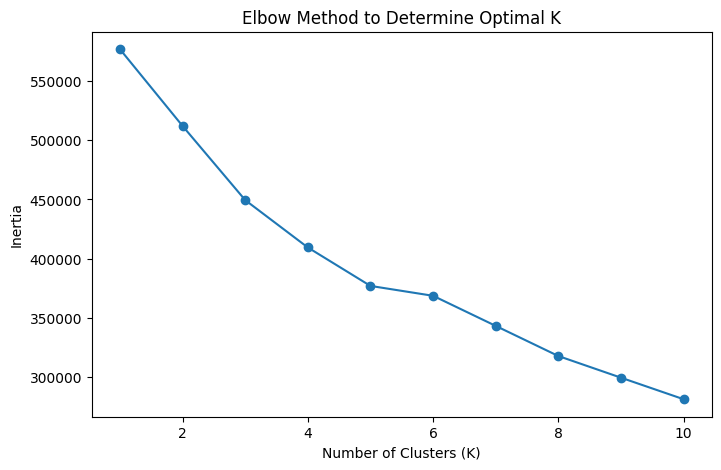

In [51]:
# Phương pháp Elbow để chọn số cụm
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

**Trả lời câu hỏi lý thuyết**

- Tại sao cần chuẩn hóa dữ liệu trước khi phân cụm?

Chuẩn hóa đảm bảo các biến có trọng số ngang nhau, tránh việc biến có đơn vị lớn hơn ảnh hưởng đến kết quả phân cụm.

- So sánh kết quả của K-means và Hierarchical clustering?

K-means: Hiệu quả với dữ liệu lớn, yêu cầu biết trước số cụm.

Hierarchical: Không cần biết số cụm trước, trực quan hơn nhưng kém hiệu quả trên tập dữ liệu lớn.

- Ảnh hưởng của số lượng cụm đến kết quả?

Số cụm không phù hợp có thể dẫn đến phân cụm không chính xác, làm giảm hiệu quả phân tích.

- So sánh K-means với thuật toán khác (VD: DBSCAN)?

K-means: Tốt cho cụm hình cầu, nhạy cảm với giá trị ngoại lai.
DBSCAN: Xử lý tốt dữ liệu không đều và ngoại lai, không cần số cụm trước, nhưng kém với cụm hình cầu hoặc mật độ thay đổi.

### Tài liệu tham khảo
- https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#introduction
- https://pca4ds.github.io/analysis-of-distances.html
- https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html
- https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp